# Question 3
# 1.Business concern

### Question 3:What were the top Australian news topics over the last decade, and what can these say about the national conversation? 

The significance of this question is that we are going to find which were the news topic australian prefer to heard and we can have insight of conversion topic which australian had in last decade.


### keystakeholder :
NEWS AGENCY: Business of news ageny depends on the viwershi of channel.This question address the issue regarding the topics which australian audience prefered to watch and national conversion .The insight from this question would be helpful for the news agency to make strategy fr their progress in their industry.



### Interpretion of question
The question will be interpreted in following way

Data collection : data has been collected from reliable sources (abc news)

Data cleaning and processing : data will be examine with checking rows and columns if there is any missing data then it would be either removed or being added based on the structure of data.The processing would take place based of the requirement of data since for this question data is required for only of decade therefore the data from 2010 to 2019 will only we considered

Data analysis : based on the processed data data analysis will take place in this we are using stopword removal,bigrands and trigands and limmatization , tfidf   and lantent dirichlet .The stopword remover will remove the commonly used stopwords from the topics words like ,is ,for ,and ,will be removed.bigrands and tigrands will consider a word as whole word when two words occur frequently togthr like hong_kong,new_york.limmatization will consider the part of speech of a word and normalised the word .tfidf will be used to know the frequency of words other then which are being used in topic from past decades.THe words would be priotize based on the tfidf value .latent dirichlet allocation will be use to know the topic which were used in pass decade to form conversation the topic will be choosed based on the keywords .

visualisation : for visualisation i am going to use wordcloud which will display the words priotize by tfidf.pyldavisualisation was used to display LDA graph

# 2.Data collection 

#### importing libraries and packages 

In [2]:
import sys
!{sys.executable} -m pip install spacy  #for limmatization
!{sys.executable} -m spacy download en
!{sys.executable} -m pip install gensim # for gensim packages
!{sys.executable} -m pip install pyLDAvis
import pandas as pd
import numpy as np
!pip install wordcloud # for visualisation
!pip install nltk # for natural process language
import nltk
import re       #regular expression
nltk.download('stopwords') # for stopword removal
from wordcloud import WordCloud # for visualisation
import matplotlib.pyplot as plt #for visualisation
from nltk.corpus import stopwords
from gensim.models import TfidfModel # for tfidf
from gensim.corpora import Dictionary
from gensim.utils import tokenize
from gensim.corpora.textcorpus import remove_stopwords # for stopword removal
from gensim.summarization import keywords
from gensim.models. ldamodel import LdaModel # for lda
import pyLDAvis
import pyLDAvis.gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel #for coherence
from gensim.utils import simple_preprocess
import spacy
from gensim.models.ldamodel import LdaModel
import pyLDAvis
import pyLDAvis.gensim
import numpy as np
import pandas as pd
from pprint import pprint

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/opt/conda/lib/python3.7/site-packages/en_core_web_sm -->
/opt/conda/lib/python3.7/site-packages/spacy/data/en
You can now load the model via spacy.load('en')
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### collection of data

In [3]:
data_news=pd.read_csv("abcnews-date-text.csv") # import data from csv
data_news                                      #display daata from csv

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers
...,...,...
1186013,20191231,vision of flames approaching corryong in victoria
1186014,20191231,wa police and government backflip on drug amne...
1186015,20191231,we have fears for their safety: victorian premier
1186016,20191231,when do the 20s start


# 3.Data cleaning and processing

#### data cleaning

In [4]:
data_news
for heading in data_news.columns:   # for each heading in the dataframe
    print(heading) 

publish_date
headline_text


In [5]:
#since data type of date is integer type therefore  changing  publish date into date format
data_news['publish_date'] = pd.to_datetime(data_news['publish_date'], format='%Y%m%d')
reindexing=data_news['headline_text']

#### processing of data
since we required the data from only the past decade so we need to get data only from 2010 to 2019 therefore should have set index as data

In [6]:
#set index as publish dat
data_news=data_news.set_index(data_news['publish_date'])
data_news=data_news.loc['2010-01-01':'2019-12-31']
data_news

,publish_date,headline_text
publish_date,,
2010-01-01,2010-01-01,12m degas stolen from museum
2010-01-01,2010-01-01,17 die in bangladesh bus crash
2010-01-01,2010-01-01,2010 to be drier after very wet 2009
2010-01-01,2010-01-01,37 catholic workers killed worldwide
2010-01-01,2010-01-01,600 hurt in philippine new year revelry
...,...,...
2019-12-31,2019-12-31,vision of flames approaching corryong in victoria
2019-12-31,2019-12-31,wa police and government backflip on drug amne...
2019-12-31,2019-12-31,we have fears for their safety: victorian premier


# 4.Analysis 
since we are concerned with only headline therefore making neww dataframe which consist of only headline_text

In [7]:
new=data_news['headline_text']
new
new.reset_index(drop=True,inplace=True) # removing index which was set as date
new

0                              12m degas stolen from museum
1                            17 die in bangladesh bus crash
2                      2010 to be drier after very wet 2009
3                      37 catholic workers killed worldwide
4                   600 hurt in philippine new year revelry
                                ...                        
675708    vision of flames approaching corryong in victoria
675709    wa police and government backflip on drug amne...
675710    we have fears for their safety: victorian premier
675711                                when do the 20s start
675712    yarraville shooting woman dead man critically ...
Name: headline_text, Length: 675713, dtype: object

In [8]:
stories_df=pd.DataFrame(new,columns=['headline_text'])
stories_df

,headline_text
0,12m degas stolen from museum
1,17 die in bangladesh bus crash
2,2010 to be drier after very wet 2009
3,37 catholic workers killed worldwide
4,600 hurt in philippine new year revelry
...,...
675708,vision of flames approaching corryong in victoria
675709,wa police and government backflip on drug amne...
675710,we have fears for their safety: victorian premier
675711,when do the 20s start


#### Tokenizing
tokenizing each sentence in headline_text 

In [9]:
tokens=list(tokenize(stories_df['headline_text'][0],lowercase=True)) # making the sentence in lower case
tokens

['m', 'degas', 'stolen', 'from', 'museum']

In [10]:
tokens=list(simple_preprocess(stories_df['headline_text'][0]))
tokens

['degas', 'stolen', 'from', 'museum']

#### stopword removal
for removing stpwords we are using remove_stopwords ,simple_preprocess from gimsim package .The result will be stored in processsed_headline column 

In [11]:
stories_df['processed_headline']=[remove_stopwords(simple_preprocess(headline_text,min_len=3)) for headline_text in stories_df['headline_text']]
stories_df

,headline_text,processed_headline
0,12m degas stolen from museum,"[degas, stolen, museum]"
1,17 die in bangladesh bus crash,"[die, bangladesh, bus, crash]"
2,2010 to be drier after very wet 2009,"[drier, wet]"
3,37 catholic workers killed worldwide,"[catholic, workers, killed, worldwide]"
4,600 hurt in philippine new year revelry,"[hurt, philippine, new, year, revelry]"
...,...,...
675708,vision of flames approaching corryong in victoria,"[vision, flames, approaching, corryong, victoria]"
675709,wa police and government backflip on drug amne...,"[police, government, backflip, drug, amnesty, ..."
675710,we have fears for their safety: victorian premier,"[fears, safety, victorian, premier]"
675711,when do the 20s start,[start]


#### bigram and trigram
bigram can be saaid as two frequently occuring wordss together and trigram can be saaid as three frequently occuring words together .gensim phrase model is used to make bigram and trigram.the important argument to phrase aree min_count and threshold.the higher the value of his parameter the harder it becomes to combine a word.

In [12]:

bigram = gensim.models.Phrases(stories_df['processed_headline'], min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[stories_df['processed_headline']], threshold=100)
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [13]:
print(trigram_mod[bigram_mod[stories_df['processed_headline'][0]]]) # printing the bigram and trigram for values

['degas', 'stolen', 'museum']


In [14]:
def make_bigrams(texts):                                                                  # making a funcition for bigram 
    return [bigram_mod[doc] for doc in texts]

In [15]:
story_words_bigrams = make_bigrams(stories_df['processed_headline']) #applying bigram to the processed_headlines
print(story_words_bigrams[:1])

[['degas', 'stolen', 'museum']]


#### lemmatize 
lemmatisation is processs of getting together the inflected form of words so that they can be analysed as isngle item.in lemmatisation the part of speech of word would be decided first and then the normalization will take place.it will be different for different part of speech.

In [16]:
# making a funcition for lemmatization
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc]) # taking words for lemmatizing
    return texts_out


In [17]:
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
data_lemmatized = lemmatization(story_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']) # taking the output of bigram as input
print(data_lemmatized[:1])

[['degas', 'steal', 'museum']]


#### tfidf 
for tfidf we are giving token to words with use of dictionary
Then we are  using corpus for doing tfidf modeling 
the words will be sorted depending on the terms value from tfidf

In [18]:
vocab=Dictionary(data_lemmatized) #dictionary
print(vocab.token2id)

{'degas': 0, 'museum': 1, 'steal': 2, 'bangladesh': 3, 'bus': 4, 'crash': 5, 'die': 6, 'drier': 7, 'wet': 8, 'catholic': 9, 'kill': 10, 'workers': 11, 'worldwide': 12, 'hurt': 13, 'new': 14, 'philippine': 15, 'revelry': 16, 'year': 17, 'abbott': 18, 'asylum_seeker': 19, 'turn': 20, 'vow': 21, 'accuse': 22, 'break': 23, 'deakin': 24, 'refused_bail': 25, 'agforce': 26, 'great_barrier': 27, 'oppose': 28, 'reef': 29, 'run': 30, 'airport': 31, 'bare': 32, 'security': 33, 'strip': 34, 'alcohol_relate': 35, 'emergency': 36, 'flood': 37, 'injury': 38, 'qld': 39, 'ward': 40, 'belgian': 41, 'comeback': 42, 'eye': 43, 'queens': 44, 'anger': 45, 'centrelink': 46, 'fast_tracks': 47, 'repayment': 48, 'boat_intercepted': 49, 'arsenal': 50, 'diaby': 51, 'gun': 52, 'sign': 53, 'young': 54, 'art': 55, 'boost': 56, 'economy': 57, 'exhibit': 58, 'local': 59, 'set': 60, 'australia': 61, 'bang': 62, 'bring': 63, 'addiction': 64, 'australias': 65, 'coal': 66, 'train': 67, 'years_ago': 68, 'birt': 69, 'nave':

In [19]:
corpus = [vocab.doc2bow(words) for words in data_lemmatized] #corpus
model=TfidfModel(corpus)
tfidf_doc=model[corpus[0]]
tfidf_doc

[(0, 0.7817322677417435), (1, 0.47532852476647025), (2, 0.40367989188796877)]

In [20]:
def get_tfidf(idx):   #funcition for tfidf
    term_values=[(vocab[el[0]],el[1]) for el in model [corpus[idx]] if el[1]>0]
    srt=sorted(term_values,key=lambda x:x[1],reverse=True)
    return list(map(lambda x: x[0],srt[:5]))

In [21]:
stories_df['tfidf'] =stories_df.index.map(get_tfidf)
stories_df

,headline_text,processed_headline,tfidf
0,12m degas stolen from museum,"[degas, stolen, museum]","[degas, museum, steal]"
1,17 die in bangladesh bus crash,"[die, bangladesh, bus, crash]","[bangladesh, bus, die, crash]"
2,2010 to be drier after very wet 2009,"[drier, wet]","[drier, wet]"
3,37 catholic workers killed worldwide,"[catholic, workers, killed, worldwide]","[worldwide, catholic, workers, kill]"
4,600 hurt in philippine new year revelry,"[hurt, philippine, new, year, revelry]","[revelry, philippine, hurt, year, new]"
...,...,...,...
675708,vision of flames approaching corryong in victoria,"[vision, flames, approaching, corryong, victoria]","[corryong, flame, vision, approach, victoria]"
675709,wa police and government backflip on drug amne...,"[police, government, backflip, drug, amnesty, ...","[bins, backflip, amnesty, drug, government]"
675710,we have fears for their safety: victorian premier,"[fears, safety, victorian, premier]","[premier, victorian, safety, fear]"
675711,when do the 20s start,[start],[start]


# 4 tfidf visualisation

we are using re for removing space
wordcloud is used to display the cluster of wordss based on the tfidf term value 
The word which has higher priority would be displayed in bigger size
the max_words is set to 50 so that only 50 most relevant wods can be displayed 
minimum length of word is set to 5 to avoid less significant words

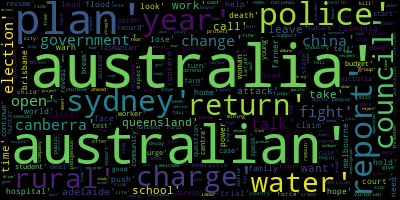

In [22]:
Topics=','.join(map(str,list(stories_df['tfidf'].values)))
#create wordcloud object

wordcloud=WordCloud(max_words=500,contour_width=4,min_word_length=5,normalize_plurals=False)
wordcloud.generate(Topics)

wordcloud.to_image()

# some improvement to assignment 1b

### latent Dirichlet allocation

 lda approach is used for topic modelling in which it consider each document as collection of topic and each topic as collection of words.It rearrange the keywords and topic to get a good composition of topic and keyword distribution

lda is provied with 3 parameter the corpus of the word,a dictionary of the words and number of topics to be represented

In [23]:
lda_model = LdaModel(corpus=corpus, id2word=vocab, num_topics=20)

# printing the number of topics with the words in topic and a number specifying its weightage in that  topic

In [24]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.150*"australia" + 0.072*"queensland" + 0.068*"win" + 0.060*"day" + '
  '0.042*"south" + 0.038*"big" + 0.033*"qld" + 0.029*"deal" + 0.028*"power" + '
  '0.028*"north"'),
 (1,
  '0.136*"man" + 0.079*"charge" + 0.067*"court" + 0.051*"government" + '
  '0.040*"labor" + 0.040*"accuse" + 0.033*"farmer" + 0.026*"sex" + '
  '0.025*"cricket" + 0.023*"officer"'),
 (2,
  '0.062*"federal" + 0.057*"school" + 0.050*"world" + 0.042*"record" + '
  '0.038*"work" + 0.034*"review" + 0.033*"worker" + 0.031*"australias" + '
  '0.030*"pay" + 0.029*"west"'),
 (3,
  '0.055*"melbourne" + 0.045*"child" + 0.039*"perth" + 0.038*"speak" + '
  '0.034*"brisbane" + 0.029*"release" + 0.027*"war" + 0.027*"rise" + '
  '0.026*"price" + 0.026*"health"'),
 (4,
  '0.073*"year" + 0.060*"bushfire" + 0.050*"help" + 0.042*"jail" + 0.037*"new" '
  '+ 0.037*"trial" + 0.033*"business" + 0.032*"chinese" + 0.023*"video" + '
  '0.023*"break"'),
 (5,
  '0.104*"election" + 0.083*"news" + 0.070*"abc" + 0.059*"canberra" + '
  '

##### interpreting the topics

This can be interpretted as :
(5,
  '0.104*"election" + 0.083*"news" + 0.070*"abc" + 0.059*"canberra" + '
  '0.042*"take" + 0.038*"warn" + 0.027*"city" + 0.027*"state" + '
  '0.027*"emergency" + 0.024*"launch"')
 it means that topic 5 is represented by following keywords and  their probability related to the topic.the probability represnt how the word is important to topic depedning on the words you can guess the topic could be and summarise .for topic 5 we can summarise that on poll or politics .we take it as politics.
 
 likewise we can summarise other topics
 topic 0:politics and government
 topic 1: crime
 topic 2:politics and goverment
 topic 3:economy and goverance
 topic 4:misc
 topic 5:politics
 topic 6: world and calamities
 topic 7:crime and goverment
 topic 8: misc
 topic 9:politics and goverment
 topic 10:policy,politics and goverment
 topic 11:politics
 topic 12 : politics and goverment
 topic 13 :politics 
 topic 14:crime and goverment
 topic 15: politics and goverment
 topic 16 :misc
 topic 17 :world politics
 topic 18:law and governance
 topic 19 :governance

In [27]:
doc = data_lemmatized[1112]
print("doc:\n",doc)
doc_topics = lda_model.get_document_topics(corpus[1],minimum_probability=0.1)
print("doc_topics:\n",doc_topics)
for topic in doc_topics:
    terms = [term for term, prob in lda_model.show_topic(topic[0])]
    print(terms)

doc:
 ['authority', 'warn', 'pool', 'spa', 'risk']
doc_topics:
 [(2, 0.20996828), (6, 0.23612407), (16, 0.38389835)]
['federal', 'school', 'world', 'record', 'work', 'review', 'worker', 'australias', 'pay', 'west']
['car', 'leave', 'drought', 'claim', 'hong_kong', 'fall', 'driver', 'climate_change', 'look', 'body']
['die', 'high', 'house', 'crash', 'hospital', 'set', 'road', 'act', 'hope', 'grow']


In [28]:
def get_topic_terms(idx):
    doc_topics = lda_model.get_document_topics(corpus[idx])
    top_topic = doc_topics[0]
    return [term for term, prob in lda_model.show_topic(top_topic[0])]

In [29]:
get_topic_terms(1)

['australia',
 'queensland',
 'win',
 'day',
 'south',
 'big',
 'qld',
 'deal',
 'power',
 'north']

# LDA visualisation

In [26]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, vocab)
vis

/opt/conda/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
3     -0.036919 -0.044445       1        1  5.938424
1     -0.343289  0.073492       2        1  5.919980
0      0.046883 -0.115824       3        1  5.819539
4      0.057924 -0.173334       4        1  5.549743
14    -0.064064 -0.041836       5        1  5.539303
7      0.047114 -0.098034       6        1  5.238973
18    -0.095732 -0.040126       7        1  5.158405
6      0.098109  0.196446       8        1  5.070364
8     -0.257775  0.037712       9        1  5.057235
13     0.042757 -0.065442      10        1  4.983243
15     0.086754  0.271735      11        1  4.875465
2      0.050294 -0.086394      12        1  4.735579
5      0.041219 -0.045553      13        1  4.703701
19     0.047347 -0.077462      14        1  4.649181
16     0.102668  0.165393      15        1  4.595304
12     0.039680 -0.017063      16        1  4.513772
11     0.026113  0.066440      17        1  4.500261
17     0.026203  0.066114      18        1  4.493796
10     0.041532 -0.029404      19        1  4.391840
9      0.043184 -0.042414      20        1  4.265888, topic_info=     Category          Freq        Term         Total  loglift  logprob
94    Default  29763.000000      police  29763.000000  30.0000  30.0000
61    Default  28053.000000   australia  28053.000000  29.0000  29.0000
167   Default  25930.000000         man  25930.000000  28.0000  28.0000
738   Default  22401.000000         say  22401.000000  27.0000  27.0000
185   Default  22252.000000  australian  22252.000000  26.0000  26.0000
...       ...           ...         ...           ...      ...      ...
1123  Topic20   1538.482300      summer   1539.901367   3.1536  -4.4916
1644  Topic20   1525.547607      scheme   1526.966675   3.1536  -4.5000
2196  Topic20   1524.046387       clash   1525.465454   3.1536  -4.5010
2380  Topic20   1383.259033       avoid   1384.678101   3.1535  -4.5979
916   Topic20   1325.462280       fraud   1326.881348   3.1534  -4.6406

[649 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
3227     13  0.999124      -PRON-
2676     13  0.999870         abc
1860      3  0.999678  aboriginal
611       1  0.999775       abuse
2207     11  0.999365      access
...     ...       ...         ...
17        4  0.999910        year
958       9  0.999309    year_old
54       17  0.999686       young
952      11  0.999189       youth
3327      4  0.999749     zealand

[631 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 2, 1, 5, 15, 8, 19, 7, 9, 14, 16, 3, 6, 20, 17, 13, 12, 18, 11, 10])

# Improved insight

The question is addressed suitably through the analysis and visualization done in both tfidf and Lda .from tfidf visualization we can see the top 50 words  which were part of headlines of  news watched by australian in a decade from 2010-2020.from this we can say that most Australian are interested in topics related to national interest since Australia and australian were the words which were occuring in headlines of news.with that other words like rural,police,world affairs,farmer,water can be seen in visualization to be occuring at frequent instancen.But this  visualization was insufficent to predict the topic therefore lda was used .With Lda topic modelling took place which considered some keywords to form a topic and was presented in the visualisation.The importancen of key word in topic can be derived from the probability of the keyword in topic which is displayed in printing of topic section.Lda has built 20 topics based on the combination of keywords and each keyword has certain weightage to a particular topic which can be seen in printing of topic section above .The topic can be intrepret as show in section above for interpretation of topic.From the visualalisation in LDA we can clearly see that there a a clusters of buble in the graph which consist of 10-11 topics and there are few topics represented in bubble which can be viewed in visualisation are close to the cluster from the topics in clusters when we click on them and see interprettaion of it from intreption of topic section above we can tell that most of them are related to politics,policy and goverment.




INSIGHT FOR NEWS AGENCY:
According to the analysis, we can have an insight that the viewers of ABC news share interest in the topic related to political updates, government rules and regulations, and also news related to policymakers.such kinds of analysis can help the news agency know what the targeted audience is interested in. From the analysis and visualization in both tfidf and LDA, it is clear that the Australian audience is more interested in local and national issues rather than an international issue. This insight can help news agencies in Australia to focus their strategy more on a national and local issue, however national issues like change in policy, rules, etc should get paid more attention and be the center of communication. With globalization and growing competitors in the industry, this insight from the analysis will give the news agency upper hand over the others. Such insight can help news agency increase their viewership and attract more business and finance for their company.

NATIONAL CONVERSION: from both the visualisation  one for the 50 most used word and other for the topic it is clear that the national conversion is focused on national and local governance issue and changes .